In [ ]:
import pandas as pd
import geopandas as gpd

# For CSV files
pop_density  = pd.read_csv('/content/sample_data/Population_density_Austin(Sheet1).csv')

# For GeoJSON files
hospitals_gdf = gpd.read_file('/content/sample_data/export.geojson')


In [ ]:

# Check for missing values in each column
missing_values = hospitals_gdf.isnull().sum()
# Display columns with missing values
print(missing_values[missing_values > 0])
# Check for missing values in the geometry column
missing_geometry = hospitals_gdf["geometry"].isnull().sum()
print(f"Missing geometry values: {missing_geometry}")



addr:building         404
addr:city             129
addr:country          401
addr:floor            404
addr:housenumber      101
                     ... 
toilets:wheelchair    404
website               214
wheelchair            362
wikidata              403
wikipedia             404
Length: 105, dtype: int64
Missing geometry values: 0


In [ ]:
import json
from shapely.geometry import shape

# Load GeoJSON file
with open("/content/sample_data/export.geojson", "r") as f:  # Replace with your actual filename
    geojson_data = json.load(f)

# Extract features
features = geojson_data["features"]

# Convert to DataFrame
data = []
for feature in features:
    properties = feature["properties"]
    geometry = shape(feature["geometry"])  # Convert geometry to Shapely object

    # Append to list
    data.append({
        "id": properties.get("@id", None),
        "name": properties.get("name", None),
        "type": properties.get("amenity", properties.get("healthcare", None)),
        "speciality": properties.get("healthcare:speciality", None),
        "city": properties.get("addr:city", None),
        "state": properties.get("addr:state", None),
        "zip": properties.get("addr:postcode", None),
        "street": properties.get("addr:street", None),
        "lat": geometry.centroid.y,  # Get centroid latitude
        "long": geometry.centroid.x,  # Get centroid longitude
        "geometry": geometry
    })

# Create a GeoDataFrame
hospitals_gdf = gpd.GeoDataFrame(data, geometry="geometry", crs="EPSG:4326")

# Display cleaned data
print(hospitals_gdf.head())


             id                                       name      type  \
0  way/29178355                             Capitol Gastro    clinic   
1  way/44538252                               CVS Pharmacy  pharmacy   
2  way/71896426  Saint David's North Austin Medical Center  hospital   
3  way/72378677                                  Walgreens  pharmacy   
4  way/72378707          Austin Emergency Center Arboretum  hospital   

         speciality    city state    zip                  street        lat  \
0  gastroenterology  Austin    TX  78750    North Ranch Road 620  30.464993   
1              None  Austin    TX  78749     West Slaughter Lane  30.184298   
2              None  Austin    TX  78758  North MoPac Expressway  30.411594   
3              None    None  None  78759      Research Boulevard  30.419406   
4              None  Austin    TX  78759         Jollyville Road  30.397975   

        long                                           geometry  
0 -97.804980  POLYGON ((-9

In [ ]:
hospitals_gdf = hospitals_gdf[["geometry", "zip"]]


In [ ]:
hospitals_gdf.head(10)

,geometry,zip
0,"POLYGON ((-97.80504 30.46483, -97.805 30.46484...",78750
1,"POLYGON ((-97.84998 30.18405, -97.84976 30.184...",78749
2,"POLYGON ((-97.70707 30.41315, -97.70736 30.412...",78758
3,"POLYGON ((-97.7482 30.41952, -97.74814 30.4192...",78759
4,"POLYGON ((-97.74946 30.39809, -97.74946 30.398...",78759
5,"POLYGON ((-97.82307 30.45723, -97.82277 30.457...",78750
6,"POLYGON ((-97.74231 30.40358, -97.74226 30.403...",None
7,"POLYGON ((-97.72041 30.39341, -97.7205 30.3931...",78758
8,"POLYGON ((-97.73344 30.35688, -97.73359 30.356...",None
9,"POLYGON ((-97.8956 30.22509, -97.89198 30.2233...",78737


In [ ]:
hospitals_gdf.isnull().sum()

,0
geometry,0
zip,119


In [ ]:

zip_boundaries = pd.read_csv("/content/sample_data/Boundaries__US_Zip_Codes_20250211.csv")

# Display the first 10 rows
zip_boundaries.head(10)


,Shape__Area,LATITUDE,SQMI,the_geom,CITY,OBJECTID,ZIPCODE,LONGITUDE,STATE,Shape__Length
0,4.300909e+09,NaN,150.68,"MULTIPOLYGON (((-122.694221 39.799206, -122.69...",West Glenn County,1,47,NaN,CA,320518.992828
1,6.861625e+09,NaN,240.78,"MULTIPOLYGON (((-122.814111 39.581398, -122.81...",Mendocino Ntl Forest,2,48,NaN,CA,595696.250082
2,8.599171e+09,NaN,297.80,"MULTIPOLYGON (((-123.692952 41.81146, -123.693...",Six Rivers National Forest,3,49,NaN,CA,663428.008382
3,4.367123e+09,NaN,151.72,"MULTIPOLYGON (((-123.531962 41.246919, -123.53...",Six Rivers Ntl Forest,4,50,NaN,CA,433109.240654
4,5.347385e+09,NaN,188.12,"MULTIPOLYGON (((-120.233377 39.030949, -120.24...",Eldorado Ntl Forest,5,51,NaN,CA,383341.215371
5,1.609150e+09,NaN,56.68,"MULTIPOLYGON (((-120.323669 38.733961, -120.32...",Eldorado Ntl Forest,6,52,NaN,CA,297585.732908
6,1.981218e+10,NaN,706.45,"MULTIPOLYGON (((-80.3666208 26.6831092, -80.36...",Southwest Palm Beach Co,7,53,NaN,FL,874964.144665
7,4.505373e+09,NaN,156.42,"MULTIPOLYGON (((-123.918651 41.366349, -123.92...",Six Rivers Ntl Forest,8,54,NaN,CA,518044.925903
8,8.243913e+09,NaN,286.56,"MULTIPOLYGON (((-123.40246 41.173877, -123.403...",Trinity Ntl Forest,9,55,NaN,CA,580285.255237
9,6.947634e+09,NaN,237.56,"MULTIPOLYGON (((-116.074628 43.372611, -116.14...",Snake River Birds of Prey,10,56,NaN,ID,392810.189911


In [ ]:
# Check for missing data in the 'geometry_austin' column
missing_geom = zip_boundaries[zip_boundaries['the_geom'].isnull()]

# Display rows with missing 'geometry_austin'
print(missing_geom)


Empty DataFrame
Columns: [Shape__Area, LATITUDE, SQMI, the_geom, CITY, OBJECTID, ZIPCODE, LONGITUDE, STATE, Shape__Length]
Index: []


In [ ]:
# Filter for Austin, TX
austin_data = zip_boundaries [(zip_boundaries ["CITY"] == "Austin") & (zip_boundaries ["STATE"] == "TX")]

# Select relevant columns
austin_data = austin_data[["the_geom", "ZIPCODE"]]

# Display the result
print(austin_data)


                                                the_geom  ZIPCODE
26280  MULTIPOLYGON (((-97.749595 30.283883, -97.7513...    78701
26281  MULTIPOLYGON (((-97.7039807 30.2825704, -97.71...    78702
26282  MULTIPOLYGON (((-97.768909 30.314542, -97.7698...    78703
26283  MULTIPOLYGON (((-97.754588 30.2649, -97.755949...    78704
26284  MULTIPOLYGON (((-97.747922 30.307119, -97.7472...    78705
26285  MULTIPOLYGON (((-97.736553 30.292559, -97.7384...    78712
26286  MULTIPOLYGON (((-97.7397332 30.5194509, -97.74...    78717
26287  MULTIPOLYGON (((-97.666997 30.217596, -97.6712...    78719
26288  MULTIPOLYGON (((-97.6657177 30.2856773, -97.66...    78721
26289  MULTIPOLYGON (((-97.7114888 30.3048268, -97.71...    78722
26290  MULTIPOLYGON (((-97.671064 30.323859, -97.6722...    78723
26291  MULTIPOLYGON (((-97.5692701 30.3422545, -97.57...    78724
26292  MULTIPOLYGON (((-97.656609 30.284061, -97.6580...    78725
26293  MULTIPOLYGON (((-97.8264449 30.4556623, -97.82...    78726
26294  MUL

In [ ]:

from shapely.geometry import Point

# Ensure 'the_geom' is a geometry column
austin_data['the_geom'] = gpd.GeoSeries.from_wkt(austin_data['the_geom'])

# Convert geometry to latitude and longitude for hospitals_gdf
hospitals_gdf['longitude'] = hospitals_gdf['geometry'].apply(lambda geom: geom.centroid.x)
hospitals_gdf['latitude'] = hospitals_gdf['geometry'].apply(lambda geom: geom.centroid.y)

# Loop through each row with missing zip code
for idx, row in hospitals_gdf[hospitals_gdf['zip'].isnull()].iterrows():
    # Create a point from the hospital's latitude and longitude
    hospital_point = Point(row['longitude'], row['latitude'])

    # Check which zip code polygon contains the hospital's coordinates
    matching_zip = austin_data[austin_data['the_geom'].apply(lambda geom: geom.contains(hospital_point))]

    if not matching_zip.empty:
        # Get the first matching zip code
        hospitals_gdf.at[idx, 'zip'] = matching_zip['ZIPCODE'].values[0]

# Check the result
hospitals_gdf['zip'].isnull().sum()


0

In [ ]:
hospitals_gdf.head(10)

,geometry,zip,longitude,latitude
0,"POLYGON ((-97.80504 30.46483, -97.805 30.46484...",78750,-97.804980,30.464993
1,"POLYGON ((-97.84998 30.18405, -97.84976 30.184...",78749,-97.850043,30.184298
2,"POLYGON ((-97.70707 30.41315, -97.70736 30.412...",78758,-97.706405,30.411594
3,"POLYGON ((-97.7482 30.41952, -97.74814 30.4192...",78759,-97.747939,30.419406
4,"POLYGON ((-97.74946 30.39809, -97.74946 30.398...",78759,-97.749338,30.397975
5,"POLYGON ((-97.82307 30.45723, -97.82277 30.457...",78750,-97.822804,30.457238
6,"POLYGON ((-97.74231 30.40358, -97.74226 30.403...",78759,-97.741966,30.403475
7,"POLYGON ((-97.72041 30.39341, -97.7205 30.3931...",78758,-97.720245,30.393230
8,"POLYGON ((-97.73344 30.35688, -97.73359 30.356...",78757,-97.733308,30.356664
9,"POLYGON ((-97.8956 30.22509, -97.89198 30.2233...",78737,-97.892349,30.226518


In [ ]:
hospitals_gdf.head()

,geometry,zip,longitude,latitude
0,"POLYGON ((-97.80504 30.46483, -97.805 30.46484...",78750,-97.804980,30.464993
1,"POLYGON ((-97.84998 30.18405, -97.84976 30.184...",78749,-97.850043,30.184298
2,"POLYGON ((-97.70707 30.41315, -97.70736 30.412...",78758,-97.706405,30.411594
3,"POLYGON ((-97.7482 30.41952, -97.74814 30.4192...",78759,-97.747939,30.419406
4,"POLYGON ((-97.74946 30.39809, -97.74946 30.398...",78759,-97.749338,30.397975


In [ ]:
hospitals_gdf.isnull().sum()

,0
geometry,0
zip,0
longitude,0
latitude,0


In [ ]:

from shapely import wkt

# Convert geometry to WKT (Well-Known Text) format
hospitals_gdf['geometry'] = hospitals_gdf['geometry'].apply(lambda geom: geom.wkt)

# Convert 'geometry' column from WKT string to actual geometry objects
hospitals_gdf['geometry'] = hospitals_gdf['geometry'].apply(wkt.loads)

# Now set the 'geometry' column to be the active geometry
hospitals_gdf = hospitals_gdf.set_geometry('geometry')

# Check the CRS (Coordinate Reference System) again
print(hospitals_gdf.crs)


None


<ipython-input-14-eb92b745b3c4>:4: UserWarning: Geometry column does not contain geometry.
  hospitals_gdf['geometry'] = hospitals_gdf['geometry'].apply(lambda geom: geom.wkt)


In [ ]:
hospitals_gdf = hospitals_gdf.set_crs('EPSG:4326', allow_override=True)


In [ ]:
hospitals_gdf.head(10)

,geometry,zip,longitude,latitude
0,"POLYGON ((-97.80504 30.46483, -97.805 30.46484...",78750,-97.804980,30.464993
1,"POLYGON ((-97.84998 30.18405, -97.84976 30.184...",78749,-97.850043,30.184298
2,"POLYGON ((-97.70707 30.41315, -97.70736 30.412...",78758,-97.706405,30.411594
3,"POLYGON ((-97.7482 30.41952, -97.74814 30.4192...",78759,-97.747939,30.419406
4,"POLYGON ((-97.74946 30.39809, -97.74946 30.398...",78759,-97.749338,30.397975
5,"POLYGON ((-97.82307 30.45723, -97.82277 30.457...",78750,-97.822804,30.457238
6,"POLYGON ((-97.74231 30.40358, -97.74226 30.403...",78759,-97.741966,30.403475
7,"POLYGON ((-97.72041 30.39341, -97.7205 30.3931...",78758,-97.720245,30.393230
8,"POLYGON ((-97.73344 30.35688, -97.73359 30.356...",78757,-97.733308,30.356664
9,"POLYGON ((-97.8956 30.22509, -97.89198 30.2233...",78737,-97.892349,30.226518


In [ ]:
pop_density.head()

,zip,population,density,City,State,State.1,"City, State",County,Country,Cordinate,lat,long
0,73301,5299,96.9,Austin,Texas,TX,"Austin,TX",Travis,US,"30.3264, -97.7713",30.3264,-97.7713
1,73344,5299,96.9,Austin,Texas,TX,"Austin,TX",Travis,US,"30.3264, -97.7713",30.3264,-97.7713
2,78701,9427,1621.8,Austin,Texas,TX,"Austin,TX",Travis,US,"30.2713, -97.7426",30.2713,-97.7426
3,78702,23389,1648.1,Austin,Texas,TX,"Austin,TX",Travis,US,"30.2638, -97.7166",30.2638,-97.7166
4,78703,20890,1366.4,Austin,Texas,TX,"Austin,TX",Travis,US,"30.2907, -97.7648",30.2907,-97.7648


In [ ]:
pop_density.isnull().sum()


,0
zip,0
population,0
density,0
City,0
State,0
State.1,0
"City, State",0
County,0
Country,0
Cordinate,0


In [ ]:


# Ensure pop_density is a copy, not a slice
pop_density = pop_density[["zip", "population", "density", "lat", "long"]].copy()

# Create geometry column using latitude and longitude
pop_density["geometry"] = pop_density.apply(lambda row: Point(row["long"], row["lat"]), axis=1)

# Convert to GeoDataFrame
pop_density_gdf = gpd.GeoDataFrame(pop_density, geometry="geometry", crs="EPSG:4326")

# Verify the result
print(pop_density_gdf.head())



     zip  population  density      lat     long                  geometry
0  73301        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)
1  73344        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)
2  78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)
3  78702       23389   1648.1  30.2638 -97.7166  POINT (-97.7166 30.2638)
4  78703       20890   1366.4  30.2907 -97.7648  POINT (-97.7648 30.2907)


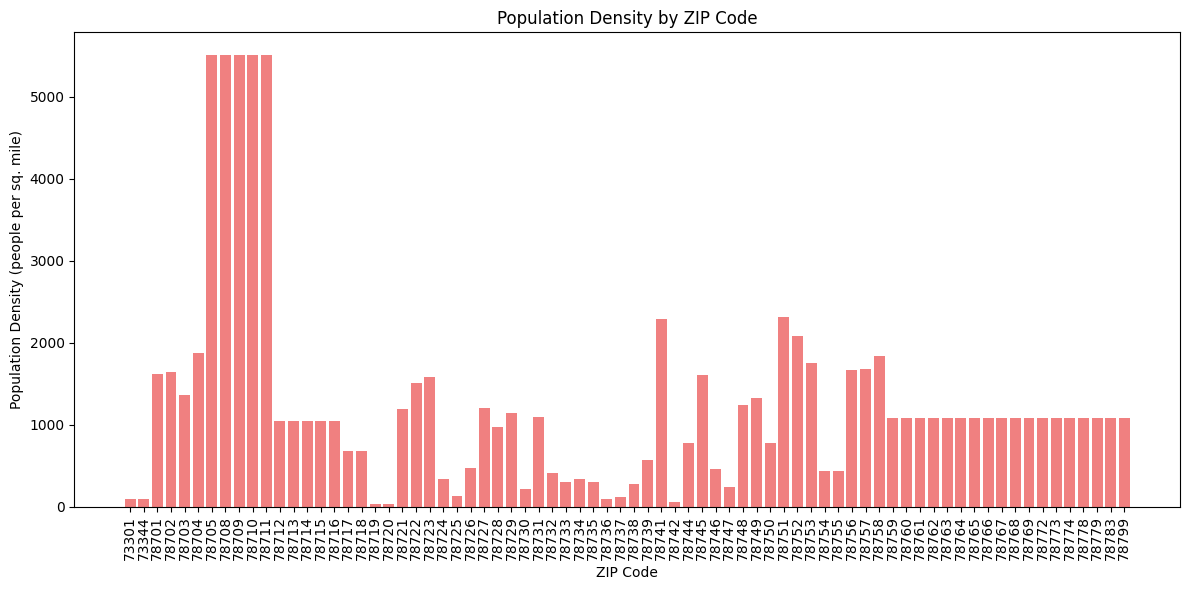

In [ ]:
import matplotlib.pyplot as plt

# Ensure ZIP codes are strings for better readability
pop_density_gdf["zip"] = pop_density_gdf["zip"].astype(str)

# Sort by ZIP code for better visualization
pop_density_gdf = pop_density_gdf.sort_values(by="zip")

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(pop_density_gdf["zip"], pop_density_gdf["density"], color="lightcoral")

# Labels and title
plt.xlabel("ZIP Code")
plt.ylabel("Population Density (people per sq. mile)")
plt.title("Population Density by ZIP Code")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Assuming hospitals_gdf has a 'zip' column
hospitals_per_zip = hospitals_gdf[['zip']]  # Extract only the 'zip' column

# Count the number of hospitals per ZIP code
hospitals_count = hospitals_per_zip.groupby("zip").size().reset_index(name="hospital_count")

# Check the result
print(hospitals_count.head(10))



     zip  hospital_count
0  78701               1
1  78702               5
2  78703               1
3  78704               9
4  78705               6
5  78722               1
6  78723               2
7  78727               3
8  78729               2
9  78730               1


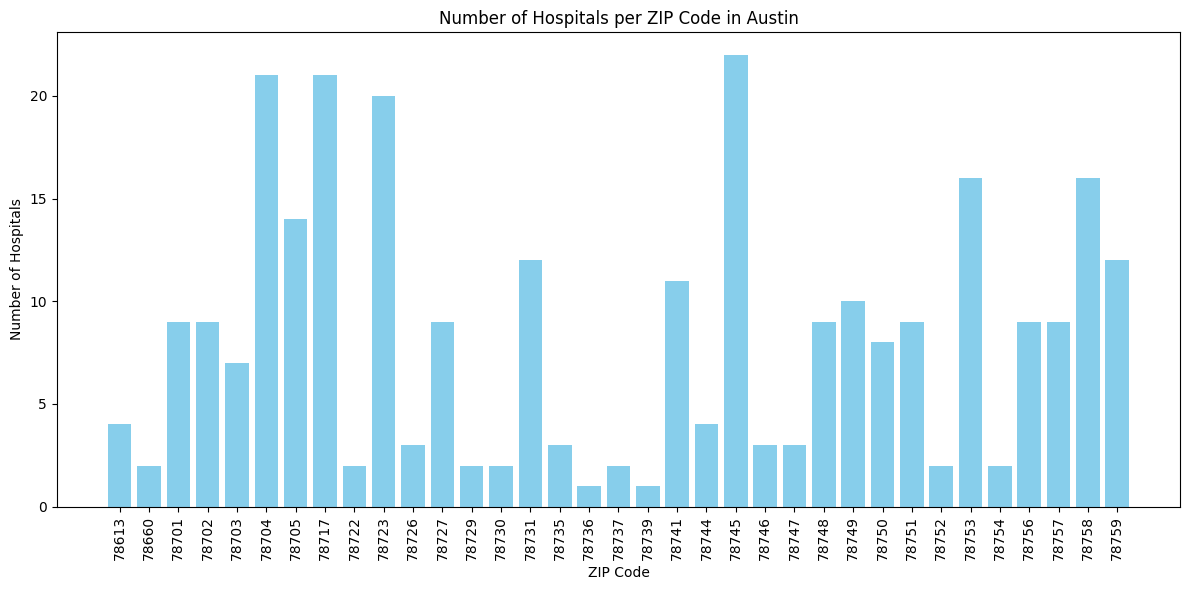

In [ ]:
# prompt: bar graph



# Ensure ZIP codes are treated as strings
hospitals_count['zip'] = hospitals_count['zip'].astype(str)

# Sort ZIP codes for better readability
hospitals_count = hospitals_count.sort_values(by="zip")

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(hospitals_count['zip'], hospitals_count['hospital_count'], color='skyblue')

# Labels and title
plt.xlabel("ZIP Code")
plt.ylabel("Number of Hospitals")
plt.title("Number of Hospitals per ZIP Code in Austin")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:


# Ensure ZIP codes are strings for consistency
hospitals_count["zip"] = hospitals_count["zip"].astype(str)
pop_density_gdf["zip"] = pop_density_gdf["zip"].astype(str)

# Merge the dataframes on ZIP code
merged_df = pd.merge(pop_density_gdf, hospitals_count, on="zip", how="left")

# Fill NaN values in hospital_count with 0 (if there are ZIPs with no hospitals)
merged_df["hospital_count"] = merged_df["hospital_count"].fillna(0)

# Display the first few rows
print(merged_df.head())


     zip  population  density      lat     long                  geometry  \
0  73301        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)   
1  73344        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)   
2  78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)   
3  78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)   
4  78702       23389   1648.1  30.2638 -97.7166  POINT (-97.7166 30.2638)   

   hospital_count  
0             0.0  
1             0.0  
2             1.0  
3             9.0  
4             9.0  


In [ ]:
import pandas as pd

# Ensure both 'zip' columns are of the same type (string)
merged_df['zip'] = merged_df['zip'].astype(str)
austin_data['ZIPCODE'] = austin_data['ZIPCODE'].astype(str)

# Check for any NaN values in the 'zip' or 'ZIPCODE' columns before merging
print(f"NaN values in merged_df['zip']: {merged_df['zip'].isna().sum()}")
print(f"NaN values in austin_data['ZIPCODE']: {austin_data['ZIPCODE'].isna().sum()}")

# Merge austin_data (with 'geom') into merged_df on 'ZIPCODE' from austin_data and 'zip' from merged_df
merged_df = pd.merge(merged_df, austin_data[["ZIPCODE", "the_geom"]], left_on="zip", right_on="ZIPCODE", how="left")

# Check for any issues after the merge, like unmatched 'zip' and 'ZIPCODE' values
print(f"After merge, number of NaN values in geometry_austin: {merged_df['the_geom'].isna().sum()}")

# Rename 'the_geom' to 'geometry_austin' in merged_df for clarity
merged_df = merged_df.rename(columns={"the_geom": "geometry_austin", "ZIPCODE": "zip"})

# Display the merged result
print(merged_df.head())




NaN values in merged_df['zip']: 0
NaN values in austin_data['ZIPCODE']: 0
After merge, number of NaN values in geometry_austin: 30
     zip  population  density      lat     long                  geometry  \
0  73301        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)   
1  73344        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)   
2  78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)   
3  78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)   
4  78702       23389   1648.1  30.2638 -97.7166  POINT (-97.7166 30.2638)   

   hospital_count    zip                                    geometry_austin  
0             0.0    NaN                                               None  
1             0.0    NaN                                               None  
2             1.0  78701  MULTIPOLYGON (((-97.7496 30.28388, -97.75135 3...  
3             9.0  78701  MULTIPOLYGON (((-97.7496 30.28388, -97.75135 3...  
4             9.

In [ ]:
# Remove duplicate rows based on the 'zip' column
unique_zip_df = merged_df.drop_duplicates(subset="zip", keep="first")

# Display the result
print(unique_zip_df.head())


     zip  population  density      lat     long                  geometry  \
0  73301        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)   
1  73344        5299     96.9  30.3264 -97.7713  POINT (-97.7713 30.3264)   
2  78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)   
4  78702       23389   1648.1  30.2638 -97.7166  POINT (-97.7166 30.2638)   
6  78703       20890   1366.4  30.2907 -97.7648  POINT (-97.7648 30.2907)   

   hospital_count    zip                                    geometry_austin  
0             0.0    NaN                                               None  
1             0.0    NaN                                               None  
2             1.0  78701  MULTIPOLYGON (((-97.7496 30.28388, -97.75135 3...  
4             9.0  78702  MULTIPOLYGON (((-97.70398 30.28257, -97.71429 ...  
6             7.0  78703  MULTIPOLYGON (((-97.76891 30.31454, -97.76984 ...  


In [ ]:
# Remove rows where 'geometry_austin' is NaN or empty
filtered_df = unique_zip_df[unique_zip_df['geometry_austin'].notna()]

# Display the result
print(filtered_df.head(10))


      zip  population  density      lat     long                  geometry  \
2   78701        9427   1621.8  30.2713 -97.7426  POINT (-97.7426 30.2713)   
4   78702       23389   1648.1  30.2638 -97.7166  POINT (-97.7166 30.2638)   
6   78703       20890   1366.4  30.2907 -97.7648  POINT (-97.7648 30.2907)   
8   78704       48486   1871.5  30.2428 -97.7658  POINT (-97.7658 30.2428)   
10  78705       33948   5511.2  30.2896 -97.7396  POINT (-97.7396 30.2896)   
16  78712         860   1042.9  30.2852 -97.7354  POINT (-97.7354 30.2852)   
21  78717       30218    674.4  30.5060 -97.7472   POINT (-97.7472 30.506)   
23  78719        1815     36.6  30.1802 -97.6667  POINT (-97.6667 30.1802)   
25  78721       12492   1191.6  30.2721 -97.6868  POINT (-97.6868 30.2721)   
26  78722        7110   1505.5  30.2893 -97.7150   POINT (-97.715 30.2893)   

    hospital_count    zip                                    geometry_austin  
2              1.0  78701  MULTIPOLYGON (((-97.7496 30.28388, 

Insights

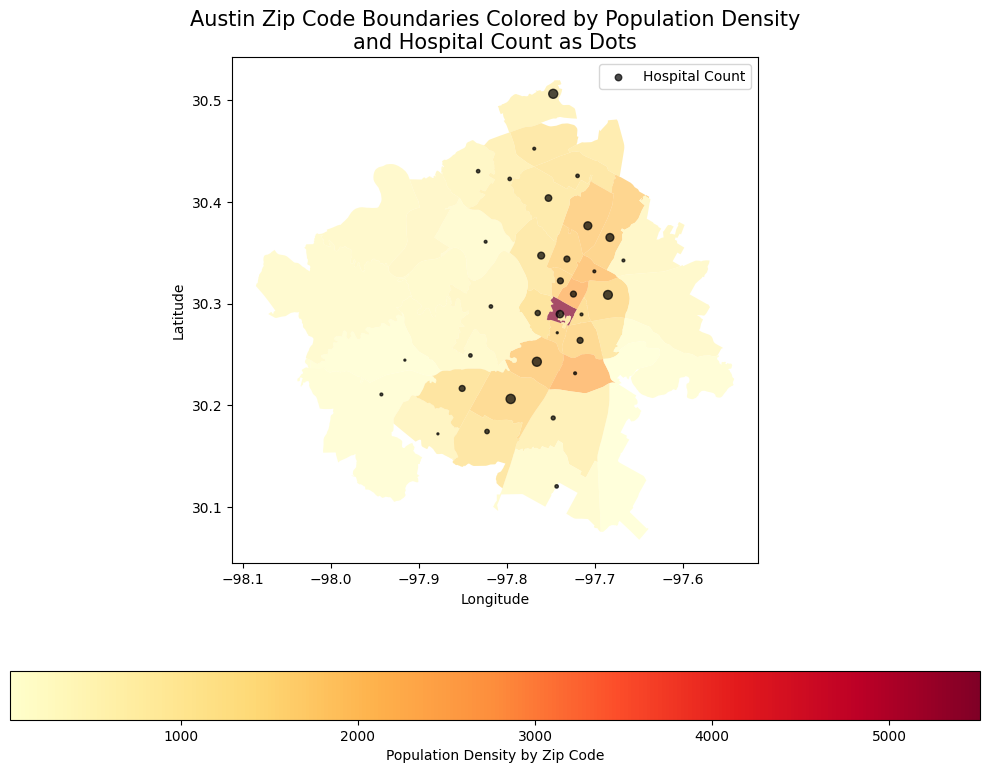

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, MultiPolygon
from shapely import wkt
import matplotlib as mpl

# Check if 'geometry_austin' and 'geometry' are already GeoSeries (if not, you can still convert them)
if isinstance(filtered_df['geometry_austin'].iloc[0], str):  # If the geometry is in WKT format (string)
    filtered_df['geometry_austin'] = filtered_df['geometry_austin'].apply(wkt.loads)

if isinstance(filtered_df['geometry'].iloc[0], str):  # If the geometry is in WKT format (string)
    filtered_df['geometry'] = filtered_df['geometry'].apply(wkt.loads)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(filtered_df, geometry='geometry')
gdf_austin = gpd.GeoDataFrame(filtered_df, geometry='geometry_austin')

# Set up a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot Austin boundaries (geometry_austin) colored by population density
# Use 'YlOrRd' (Yellow-Orange-Red) colormap for population density
gdf_austin.plot(column='density', ax=ax, legend=True, cmap='YlOrRd', alpha=0.7,
                legend_kwds={'label': "Population Density by Zip Code", 'orientation': "horizontal"})

# Plot hospital count as dots on top of the boundaries (geometry)
# Use black color for the dots
# Size of the dots will depend on the hospital count (dot size is proportional to the hospital count)
gdf.plot(ax=ax, marker='o', color='black',
         markersize=gdf['hospital_count'] * 2,  # Adjust the scaling factor as needed (e.g., 2 for larger dots)
         alpha=0.7, label="Hospital Count")

# Set title and labels
ax.set_title('Austin Zip Code Boundaries Colored by Population Density\nand Hospital Count as Dots', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend for hospital count
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()




/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


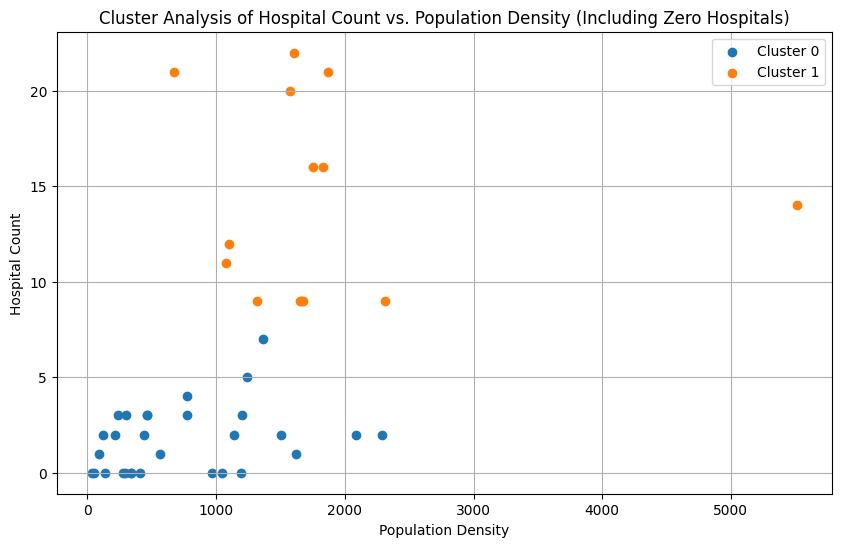

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming filtered_df is already loaded

# Step 1: Add all rows including those with hospital_count = 0
# Here, we are not filtering anything, so it will include rows with hospital_count = 0
data_for_clustering = filtered_df[['density', 'hospital_count']]

# Step 2: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Step 3: Perform K-means clustering
# Choose 3 clusters: one for hospital_count > 0, and one for hospital_count = 0
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Step 4: Add the cluster labels to the original dataframe
filtered_df['cluster'] = clusters

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(2):
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_num]
    # Use different colors for each cluster
    plt.scatter(cluster_data['density'], cluster_data['hospital_count'], label=f'Cluster {cluster_num}')

plt.xlabel("Population Density")
plt.ylabel("Hospital Count")
plt.title("Cluster Analysis of Hospital Count vs. Population Density (Including Zero Hospitals)")
plt.legend()
plt.grid(True)
plt.show()




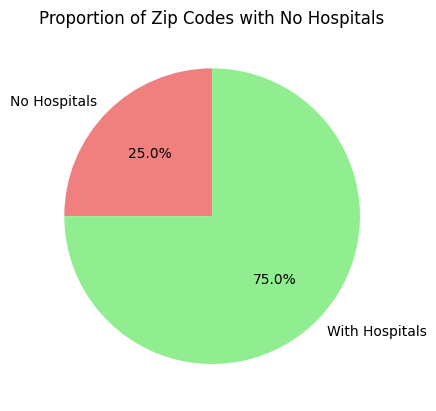

In [ ]:
no_hospitals = filtered_df[filtered_df['hospital_count'] == 0]
with_hospitals = filtered_df[filtered_df['hospital_count'] > 0]

labels = ['No Hospitals', 'With Hospitals']
sizes = [len(no_hospitals), len(with_hospitals)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title("Proportion of Zip Codes with No Hospitals")
plt.show()


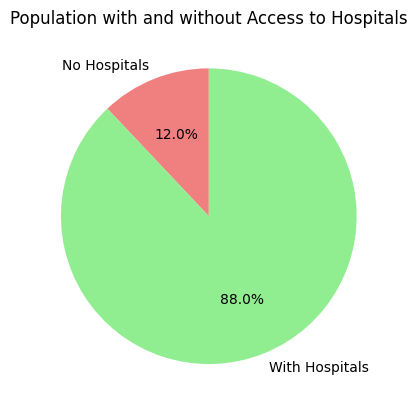

Total Population: 1087962
Population with no hospitals: 130934
Population with hospitals: 957028


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_df' contains the data

# Step 1: Calculate the total population
total_population = filtered_df['population'].sum()

# Step 2: Calculate the population for zip codes with no hospitals
no_hospitals_population = filtered_df[filtered_df['hospital_count'] == 0]['population'].sum()

# Step 3: Calculate the population for zip codes with hospitals
with_hospitals_population = total_population - no_hospitals_population

# Step 4: Create a pie chart of the population with and without hospital access
sizes = [no_hospitals_population, with_hospitals_population]
labels = ['No Hospitals', 'With Hospitals']
colors = ['lightcoral', 'lightgreen']

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Population with and without Access to Hospitals")
plt.show()

# Optional: Printing the results for verification
print(f"Total Population: {total_population}")
print(f"Population with no hospitals: {no_hospitals_population}")
print(f"Population with hospitals: {with_hospitals_population}")


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


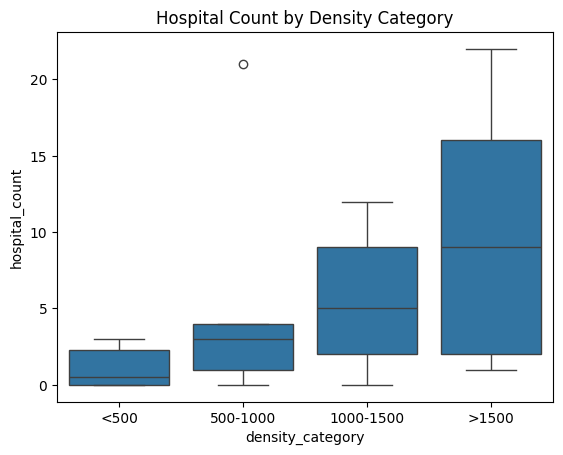

In [ ]:
import seaborn as sns

filtered_df['density_category'] = pd.cut(filtered_df['density'], bins=[0, 500, 1000, 1500, 5000], labels=['<500', '500-1000', '1000-1500', '>1500'])

sns.boxplot(x='density_category', y='hospital_count', data=filtered_df)
plt.title("Hospital Count by Density Category")
plt.show()


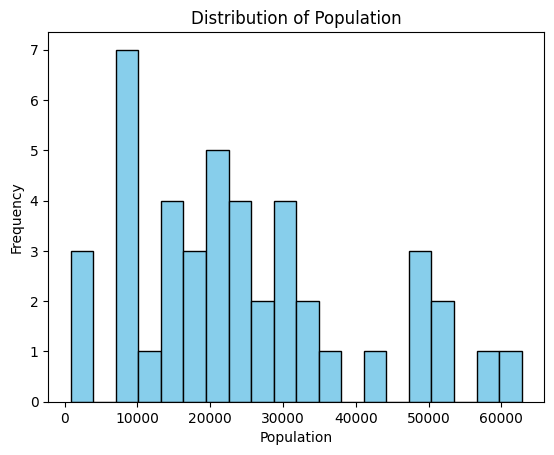

In [ ]:
plt.hist(filtered_df['population'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Filter zip codes with no hospitals
no_hospital_areas = filtered_df[filtered_df['hospital_count'] == 0]

# If you want to print specific columns (zip, population, density) for readability:
print(no_hospital_areas[['zip', 'population', 'density']])


      zip    zip  population  density
16  78712  78712         860   1042.9
23  78719  78719        1815     36.6
25  78721  78721       12492   1191.6
30  78724  78724       24779    338.9
31  78725  78725        7886    133.1
35  78728  78728       21480    966.4
42  78732  78732       17849    407.4
43  78733  78733        8611    295.4
44  78734  78734       18745    339.1
50  78738  78738       15589    275.7
54  78742  78742         828     54.9


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


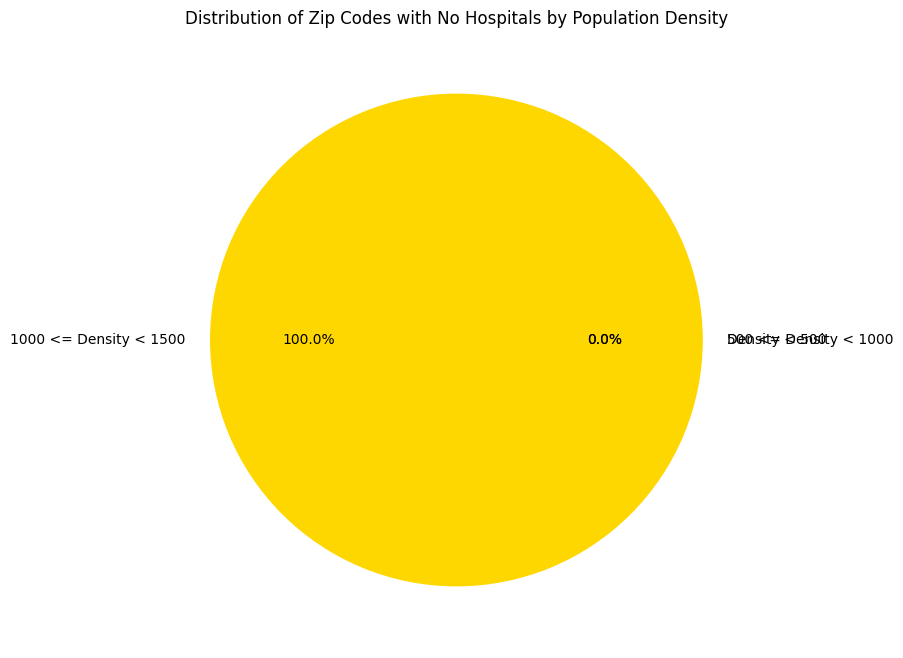

In [ ]:
import matplotlib.pyplot as plt

# Create the new categories based on density
no_hospital_areas['density_category'] = pd.cut(no_hospital_areas['density'],
                                              bins=[0, 500, 1000, 1500],
                                              labels=['Density < 500', '500 <= Density < 1000', '1000 <= Density < 1500'])

# Count the occurrences of each category
density_counts = no_hospital_areas['density_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(density_counts, labels=density_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title("Distribution of Zip Codes with No Hospitals by Population Density")
plt.show()




In [ ]:
# Filter zip codes with no hospitals and a population greater than 7,000
no_hospital_areas = filtered_df[(filtered_df['hospital_count'] == 0) & (filtered_df['population'] > 10000)]



# If you want to print specific columns (zip, population, density) for readability:
print(no_hospital_areas[['zip', 'population', 'density']])


      zip    zip  population  density
25  78721  78721       12492   1191.6
30  78724  78724       24779    338.9
35  78728  78728       21480    966.4
42  78732  78732       17849    407.4
44  78734  78734       18745    339.1
50  78738  78738       15589    275.7


In [ ]:
# Filter zip codes with no hospitals and a population greater than 7,000
no_hospital_areas = filtered_df[(filtered_df['hospital_count'] == 0) & (filtered_df['density'] > 100)]



# If you want to print specific columns (zip, population, density) for readability:
print(no_hospital_areas[['zip', 'population', 'density']])

      zip    zip  population  density
16  78712  78712         860   1042.9
25  78721  78721       12492   1191.6
30  78724  78724       24779    338.9
31  78725  78725        7886    133.1
35  78728  78728       21480    966.4
42  78732  78732       17849    407.4
43  78733  78733        8611    295.4
44  78734  78734       18745    339.1
50  78738  78738       15589    275.7


In [ ]:
# Filter zip codes with no hospitals and a population greater than 7,000
no_hospital_areas = filtered_df[(filtered_df['hospital_count'] == 0) & (filtered_df['density'] > 1000)]



# If you want to print specific columns (zip, population, density) for readability:
print(no_hospital_areas[['zip', 'population', 'density']])

      zip    zip  population  density
16  78712  78712         860   1042.9
25  78721  78721       12492   1191.6


In [ ]:
# Define thresholds
large_population_threshold = 30000  # Considered a large population
few_hospitals_threshold = 5         # Few hospitals

# Filter for large population with few hospitals
large_pop_few_hospitals = filtered_df[
    (filtered_df['population'] > large_population_threshold) &
    (filtered_df['hospital_count'] <= few_hospitals_threshold)
]

# Filter for lower population but hospitals are present (at least 1)
lower_pop_with_hospitals = filtered_df[
    (filtered_df['population'] <= 10000) &
    (filtered_df['hospital_count'] >= 1)
]

# Display the results
print("Large population with few hospitals:")
print(large_pop_few_hospitals[['zip', 'population', 'hospital_count','density']])

print("\nLower population areas with hospitals:")
print(lower_pop_with_hospitals[['zip', 'population', 'hospital_count','density']])


Large population with few hospitals:
      zip    zip  population  hospital_count  density
52  78741  78741       52716             2.0   2285.4
55  78744  78744       48969             4.0    771.6
62  78748  78748       50997             5.0   1238.0
66  78750  78750       30847             3.0    772.0

Lower population areas with hospitals:
      zip    zip  population  hospital_count  density
2   78701  78701        9427             1.0   1621.8
26  78722  78722        7110             2.0   1505.5
38  78730  78730        9186             2.0    210.7
47  78736  78736        9047             1.0     92.5
76  78756  78756        8323             9.0   1661.7


In [ ]:
# Filter for zip codes with zero hospitals and density greater than 500
zero_hospital_zip_codes = filtered_df[(filtered_df['hospital_count'] == 0) & (filtered_df['density'] > 500)]

# Display the results
print("Zip codes with zero hospitals and density greater than 500:")
print(zero_hospital_zip_codes[['zip', 'population', 'density', 'hospital_count']])



Zip codes with zero hospitals and density greater than 500:
      zip    zip  population  density  hospital_count
16  78712  78712         860   1042.9             0.0
25  78721  78721       12492   1191.6             0.0
35  78728  78728       21480    966.4             0.0


In [ ]:
# Filter for zip codes with zero hospitals
zero_hospital_zip_codes = filtered_df[filtered_df['hospital_count'] == 0]

# Display the results
print("Zip codes with zero hospitals:")
print(zero_hospital_zip_codes[['zip', 'population', 'density', 'hospital_count']])

Zip codes with zero hospitals:
      zip    zip  population  density  hospital_count
16  78712  78712         860   1042.9             0.0
23  78719  78719        1815     36.6             0.0
25  78721  78721       12492   1191.6             0.0
30  78724  78724       24779    338.9             0.0
31  78725  78725        7886    133.1             0.0
35  78728  78728       21480    966.4             0.0
42  78732  78732       17849    407.4             0.0
43  78733  78733        8611    295.4             0.0
44  78734  78734       18745    339.1             0.0
50  78738  78738       15589    275.7             0.0
54  78742  78742         828     54.9             0.0


In [ ]:
# Save DataFrame to CSV
filtered_df.to_csv("healthcare_spatial_distribution.csv", index=False)

print("Data has been saved as 'healthcare_spatial_distribution.csv'.")


Data has been saved as 'healthcare_spatial_distribution.csv'.
